# PID KUKA

Simulação considerando um robô de 7 graus de liberdade do tipo KUKA LWR. A simulação faz uso de um arquivo do tipo urdf, que contém os dados da dinâmica do robô. O arquivo encontra-se no mesmo diretório deste notebook.

In [8]:
include("comum.jl")
include("modelos.jl")
using Evolutionary, Plots;
pyplot();

In [9]:
Ts = 0.08
tend = 4.0
t0 = 0.0
xr = SVector{7}([1.,1.,0.5,0.6,0.5,1.2,0.8]);

In [10]:
function plotx()
    p1 = plot(t,x[1], label = "simulação 1")
    p1= plot!([xr[1]],seriestype= :hline, label = "referência 1")
    p2 = plot(t,x[2], label = "simulação 2")
    p2= plot!([xr[2]],seriestype= :hline, label = "referência 2")
    p3 = plot(t,x[3], label = "simulação 3")
    p3= plot!([xr[3]],seriestype= :hline, label = "referência 3")
    p4 = plot(t,x[4], label = "simulação 4")
    p4= plot!([xr[4]],seriestype= :hline, label = "referência 4")
    p5 = plot(t,x[5], label = "simulação 5")
    p5= plot!([xr[5]],seriestype= :hline, label = "referência 5")
    p6 = plot(t,x[6], label = "simulação 6")
    p6= plot!([xr[6]],seriestype= :hline, label = "referência 6")
    p7 = plot(t,x[7], label = "simulação 7")
    p7= plot!([xr[7]],seriestype= :hline, label = "referência 7")
    plot(p1,p2,p3,p4,p5,p6,p7, layout =(7,1))
end

function plotx(i::Integer)
    p1 = plot(t,x[i], label = "desejado")
    p1= plot!([xr[i]],seriestype= :hline, label = "referência");
end;    

In [11]:
kp = SMatrix{7,7}(diagm([1760.,8330.,4800.,3150.,330.,300.,10.]))
kv = SMatrix{7,7}(diagm([735.,2820.,900.,900.,130.,70.,3.]))
x, v, t, a, ta, j, tj = kukaRobot(kp, kv, Ts, t0, tend, xr);

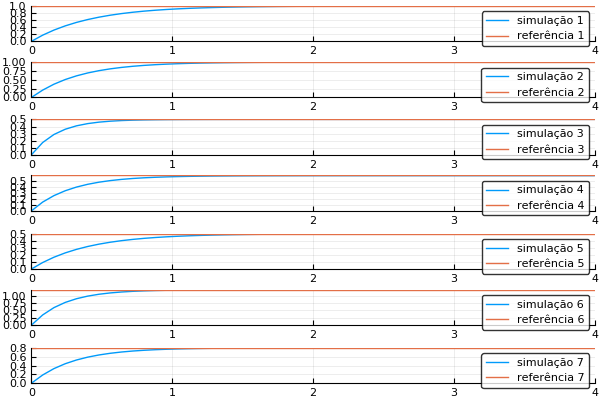

In [12]:
plotx()

In [15]:
println("Somatório do módulo do jerk")
for i = 1:7
    println("junta $(i) -> $(sum(abs.(j[i])))")
end
soma_jerk= 0.
for i = 1:7
    soma_jerk += sum(abs.(j[i]))
end
println("jerk total: $(soma_jerk)")

Somatório do módulo do jerk
junta 1 -> 415.9630690484622
junta 2 -> 521.8636269311987
junta 3 -> 462.8029709623534
junta 4 -> 364.55662709815584
junta 5 -> 229.37834942918914
junta 6 -> 908.976284456775
junta 7 -> 472.26328447272635
jerk total: 3375.8042123988607


In [14]:
println("Máximo módulo do jerk")
for i = 1:7
    println("junta $(i) -> $(maximum(abs.(j[i])))")
end 
soma_jerk_max = 0.
for i = 1:7
    soma_jerk_max += maximum(abs.(j[i]))
end
println("jerk máximo total: $(soma_jerk_max)")

Máximo módulo do jerk
junta 1 -> 361.79920558617505
junta 2 -> 444.3398471043412
junta 3 -> 365.13950999721726
junta 4 -> 304.4693194886015
junta 5 -> 194.697730727863
junta 6 -> 741.0535958512777
junta 7 -> 395.9068860395895
jerk máximo total: 2807.406094795065
